<a href="https://colab.research.google.com/github/anu04596/DeepLearningTuotorial/blob/main/Day4(FashionMNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


Load FashionMNIST dataset

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))])

#Download train and test dataset
train_set=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_set=torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader=torch.utils.data.DataLoader(train_set,batch_size=64,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_set,batch_size=64,shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.36MB/s]


MLP Model

In [3]:
class FashionClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(28*28,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,10)

  def forward(self,x):
    x=x.view(-1,28*28)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    return self.fc3(x)

Training Components

In [4]:
model = FashionClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Training

In [5]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.4907
Epoch 2, Loss: 0.3623
Epoch 3, Loss: 0.3275
Epoch 4, Loss: 0.3047
Epoch 5, Loss: 0.2839


Testing

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")



Test Accuracy: 87.35%


Visualize Predictions

In [7]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

dataiter = iter(test_loader)
images, labels = next(dataiter)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)



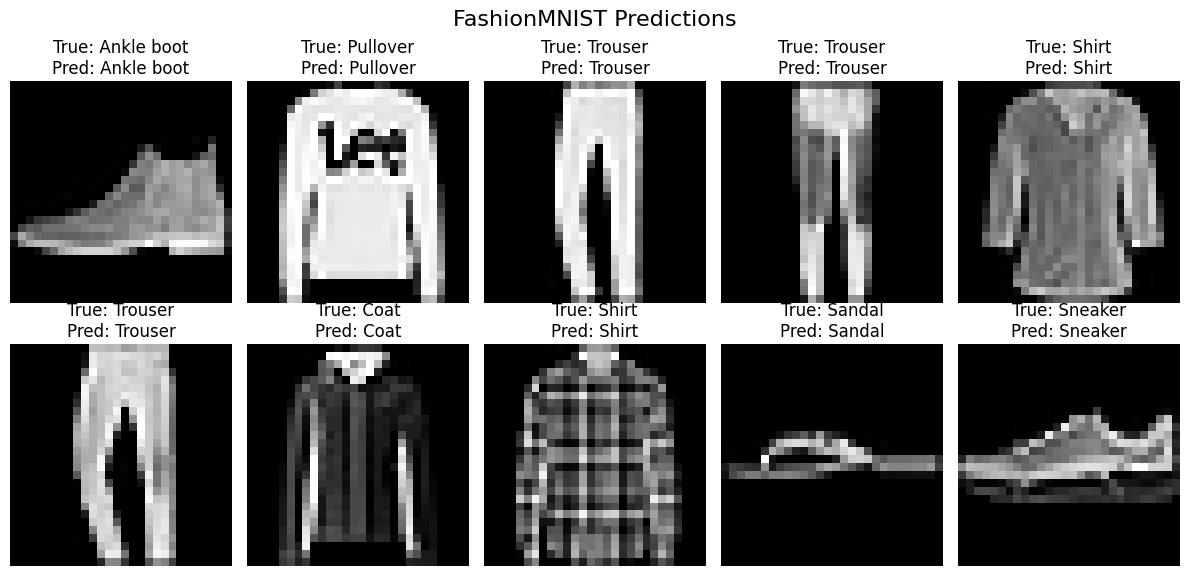

In [8]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"True: {classes[labels[i]]}\nPred: {classes[preds[i]]}")
    plt.axis('off')
plt.suptitle("FashionMNIST Predictions", fontsize=16)
plt.tight_layout()
plt.show()
